In [1]:
# Estimate Sphere Falling Speed assuming laminar (Stokes) flow

# --- Inputs ---
gravity = 9.81  # m/s^2
viscosity = 15.103  # Ns/m^2
density_liquid = (69.5 / 50) * 1000 * 1000  # kg/m^3
density_sphere = 11.350 * 1000 * 1000  # kg/m^3
diameter = 0.0025  # meters (nominal 2.5 mm sphere)

# --- Print Inputs ---
print("INPUTS:")
print(f"  Gravitational acceleration = {gravity:.2f} m/s^2")
print(f"  Dynamic viscosity of liquid = {viscosity:.3f} Ns/m^2")
print(f"  Density of liquid = {density_liquid:.1f} kg/m^3")
print(f"  Density of sphere = {density_sphere:.1f} kg/m^3")
print(f"  Sphere diameter = {diameter*1000:.2f} mm")

# --- Computation ---
upper_support_terminal_speed = (gravity * diameter**2) * (density_sphere - density_liquid) / (18.0 * viscosity)

# --- Output ---
print("\nOUTPUT:")
print(f"  Estimated terminal speed (Stokes flow) = {upper_support_terminal_speed * 1000:.3f} mm/s")


INPUTS:
  Gravitational acceleration = 9.81 m/s^2
  Dynamic viscosity of liquid = 15.103 Ns/m^2
  Density of liquid = 1390000.0 kg/m^3
  Density of sphere = 11350000.0 kg/m^3
  Sphere diameter = 2.50 mm

OUTPUT:
  Estimated terminal speed (Stokes flow) = 2246.325 mm/s


In [2]:
# Script to
import math
## Static values
## Verify by direct measurement of apparatus
R1 = 100 #mm
R2 = 200 #mm
R3 = 200 #mm
B  =  75 #mm Breath of plane (how wide is the quadrant balance)
## Liquid Properties
Temp = 20 #degrees celsius (use to look up water density
rho  = 998 #density kg/m^3
SpW  = 9790 #specific weight N/m^3
## Measured Values
y = 100 # millimeters Distance from pivot to water surface
W = 50  # grams Weights on hanger, so top arm is level 
## Computed Values
depth = R2-y
print(depth)
angle = math.acos(1 - 2.0*(depth)/(2.0*R2))
Area = ((1/8)*(2.0*R2)**2)*(angle - math.sin(angle)*math.cos(angle))
print(f"Area of liquid {Area:.3f} ---s")
Volume = B*Area
Fw = SpW*Volume*(1/1000)**3
ybar = (4*R2*math.sin(angle)**3)/(3*(2*angle -math.sin(2*angle)))
#xbar =
Fp = (Fw/math.cos(angle))*(math.sin(angle))
print(f"Weight of liquid {Fw:.3f} Newtons")
print(Fp)

100
Area of liquid 12283.697 ---s
Weight of liquid 9.019 Newtons
15.621893663779499


In [3]:
Y = depth
print(Y)
X = math.sin(angle)*R2
print(angle)
print(X)
AA = Y*X 
print(AA)
AB = -AA + ( (X/2)*math.sqrt(R2**2 - X**2) + (R2**2/2)*math.asin(X/R2) )
print(AB)

100
1.0471975511965979
173.20508075688775
17320.508075688776
12283.696986087569


Numerical area (quad): 12283.697
Numerical x_bar (quad): 67.841
Numerical y_bar (quad): 58.996


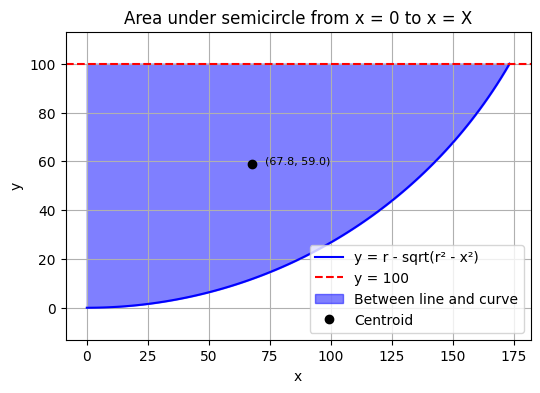

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
from math import sqrt, asin
from scipy.integrate import quad

## Quandrant Balance Script for UNSUBMERGED CASES 
## Verify by direct measurement on apparatus
## These are constants, just check they agree with the physcial instrument
R1 = 100 #mm Inner radius of balance
R2 = 200 #mm Outer radius of balance
R3 = 200 #mm Moment arm for weight hanger
B  =  75 #mm Breath of plane (how wide is the quadrant balance between front and back walls - inside measure)
## BE SURE BALANCE IS TRIMMED LEVEL BEFORE MAKING REMAINING MEASUREMENTS 
## The moment analysis depends on trimmed empty tank, so its mass does not controbute to the moment balance.
## Liquid Properties 
## Measure at beginning of experiment, they wont change during experiment enough to impact results.
Temp = 20 #degrees celsius (use value to look up water density)
rho  = 998 #density kg/m^3
SpW  = 9790 #specific weight N/m^3
## Measured Values
d = 100 # millimeters Distance from pivot to water surface
W = 50  # grams Weights on hanger, so top arm is level 

# dA, xdA, ydA functions for computing areas and centroids of water prisim based on measured depth to water surface 
def dA_numeric(X,Y,r):
    integrand = lambda x: Y - (r - np.sqrt(r**2 - x**2))
    result, _ = quad(integrand, 0, X)
    return result

def xdA_numeric(X,Y,r):
    integrand = lambda x: Y*x - x*(r - np.sqrt(r**2 - x**2))
    result, _ = quad(integrand, 0, X)
    return result

def ydA_numeric(X, Y, r):
    integrand = lambda x: 0.5 * (Y**2 - (r - np.sqrt(r**2 - x**2))**2)
    result, _ = quad(integrand, 0, X)
    return result

## Computed Values
r = R2
depth = R2-d
Y = depth
angle = math.acos(1 - 2.0*(depth)/(2.0*R2))
X = math.sin(angle)*R2
#debug print(X,Y,r)

A_numeric =dA_numeric(X,Y, r)
xA_numeric = xdA_numeric(X,Y,r)
yA_numeric = ydA_numeric(X, Y, r)
x_bar = xA_numeric/A_numeric
y_bar = yA_numeric / A_numeric

print(f"Numerical area (quad): {A_numeric:.3f}")
print(f"Numerical x_bar (quad): {x_bar:.3f}")
print(f"Numerical y_bar (quad): {y_bar:.3f}")

y_line = Y

# Semicircle curve
x_vals = np.linspace(0, X, 100)
y_vals = r - np.sqrt(r**2 - x_vals**2)

# Create the horizontal line y = y_line over same x range
y_const = np.full_like(x_vals, y_line)

# Plot everything
plt.figure(figsize=(6, 4))
plt.plot(x_vals, y_vals, label='y = r - sqrt(r² - x²)', color='blue')
#plt.fill_between(x_vals, y_vals, alpha=0.3, color='blue', label='Area A(X)')

# Plot horizontal line
plt.axhline(y=y_line, color='red', linestyle='--', label=f'y = {y_line}')

# Fill between curve and horizontal line
plt.fill_between(x_vals, y_line, y_vals, where=(y_vals < y_line), 
                 interpolate=True, color='blue', alpha=0.5, 
                 label='Between line and curve')
plt.plot(x_bar, y_bar, 'ko', label='Centroid')
plt.text(x_bar + 5, y_bar, f'({x_bar:.1f}, {y_bar:.1f})', fontsize=8)
plt.title("Area under semicircle from x = 0 to x = X")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend(loc='lower right')
plt.axis('equal')
plt.show()

Numerical area A (quad): 12283.697 mm²
Numerical x̄ (quad): 67.841 mm
Numerical ȳ (quad): 58.996 mm


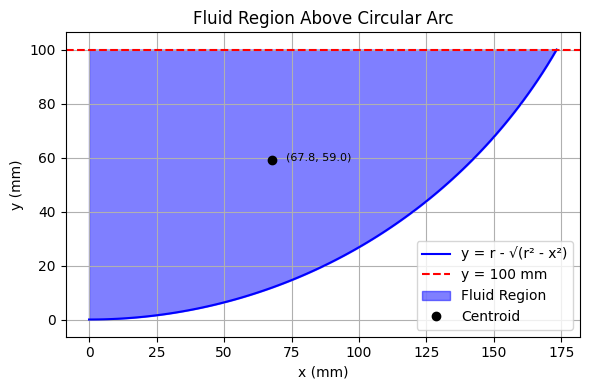

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
from math import sqrt, asin
from scipy.integrate import quad

## Quadrant Balance Script for UNSUBMERGED CASES 
## Verify by direct measurement on apparatus
## These are constants, just check they agree with the physical instrument
R1 = 100 # mm Inner radius of balance
R2 = 200 # mm Outer radius of balance (also acts as radius of curved face)
R3 = 200 # mm Moment arm for weight hanger
B  =  75 # mm Breadth of plane (how wide is the quadrant balance between front and back walls - inside measure)

## BE SURE BALANCE IS TRIMMED LEVEL BEFORE MAKING REMAINING MEASUREMENTS 
## The moment analysis depends on trimmed empty tank, so its mass does not contribute to the moment balance.

## Liquid Properties 
## Measure at beginning of experiment, they won't change during experiment enough to impact results.
Temp = 20 # degrees Celsius (use value to look up water density)
rho  = 998 # density in kg/m^3
SpW  = 9790 # specific weight in N/m^3 (use if you work in force balance directly)

## Measured Values (modify for each test)
d = 100 # mm Distance from pivot to water surface (measured vertically)
W = 50  # grams Weights on hanger (to balance hydrostatic moment)

# === Area and Centroid Integrals ===
# The following compute area and first moments of area for the fluid wedge above the circular arc and below waterline

# Area of curved segment from x=0 to x=X
def dA_numeric(X, Y, r):
    integrand = lambda x: Y - (r - np.sqrt(r**2 - x**2))  # height of fluid above curved surface
    result, _ = quad(integrand, 0, X)
    return result

# First moment of area about y-axis (used to get x̄)
def xdA_numeric(X, Y, r):
    integrand = lambda x: x * (Y - (r - np.sqrt(r**2 - x**2)))
    result, _ = quad(integrand, 0, X)
    return result

# First moment of area about x-axis (used to get ȳ)
def ydA_numeric(X, Y, r):
    integrand = lambda x: 0.5 * (Y**2 - (r - np.sqrt(r**2 - x**2))**2)
    result, _ = quad(integrand, 0, X)
    return result

# === Geometry Calculations from Inputs ===
r = R2
depth = R2 - d  # Vertical depth of water below quadrant pivot point
Y = depth       # y = depth of horizontal waterline from center of arc

# Compute angle θ and horizontal X extent of wetted curved area
angle = math.acos(1 - 2.0 * depth / (2.0 * r))  # radians subtended by chord
X = math.sin(angle) * r  # horizontal reach of water surface from centerline to edge

# === Numerical Integrations ===
A_numeric = dA_numeric(X, Y, r)
xA_numeric = xdA_numeric(X, Y, r)
yA_numeric = ydA_numeric(X, Y, r)

x_bar = xA_numeric / A_numeric
y_bar = yA_numeric / A_numeric

print(f"Numerical area A (quad): {A_numeric:.3f} mm²")
print(f"Numerical x̄ (quad): {x_bar:.3f} mm")
print(f"Numerical ȳ (quad): {y_bar:.3f} mm")

# === Plotting for Visual Sanity Check ===
y_line = Y  # constant waterline height

# Semicircle arc
x_vals = np.linspace(0, X, 100)
y_vals = r - np.sqrt(r**2 - x_vals**2)  # arc height

# Horizontal waterline (constant height)
y_const = np.full_like(x_vals, y_line)

# Begin plot
plt.figure(figsize=(6, 4))
plt.plot(x_vals, y_vals, label='y = r - √(r² - x²)', color='blue')
plt.axhline(y=y_line, color='red', linestyle='--', label=f'y = {y_line:.0f} mm')

# Fill fluid region (between curve and waterline)
plt.fill_between(x_vals, y_line, y_vals, where=(y_vals < y_line), 
                 interpolate=True, color='blue', alpha=0.5, 
                 label='Fluid Region')

# Mark centroid
plt.plot(x_bar, y_bar, 'ko', label='Centroid')
plt.text(x_bar + 5, y_bar, f'({x_bar:.1f}, {y_bar:.1f})', fontsize=8)

# Format plot
plt.title("Fluid Region Above Circular Arc")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.grid(True)
plt.axis('equal')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


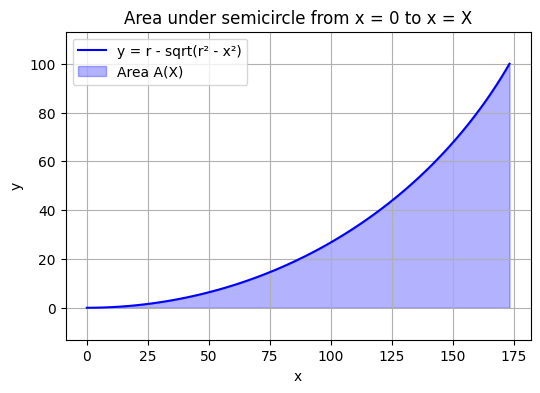

In [6]:
# Optional: Plotting for visual sanity check
x_vals = np.linspace(0, X, 100)
y_vals = r - np.sqrt(r**2 - x_vals**2)

plt.figure(figsize=(6, 4))
plt.plot(x_vals, y_vals, label='y = r - sqrt(r² - x²)', color='blue')
plt.fill_between(x_vals, y_vals, alpha=0.3, color='blue', label='Area A(X)')
plt.title("Area under semicircle from x = 0 to x = X")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.axis('equal')

# Invert the y-axis so x-axis appears at top
#plt.gca().invert_yaxis()

plt.show()

Submerged Annular Area: 15035.96 mm²
Centroid x̄: 75.37 mm
Centroid ȳ: 73.69 mm


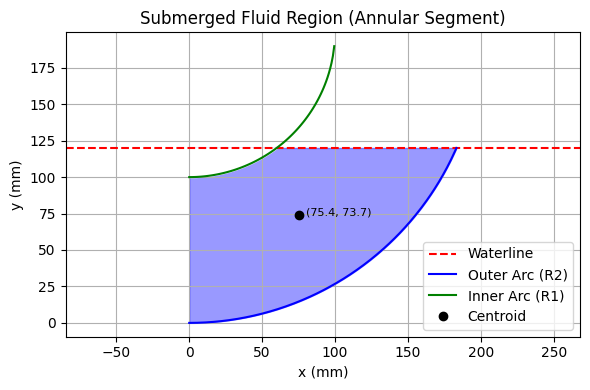

In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import quad

# === Instrument Constants ===
R1 = 100  # mm Inner radius
R2 = 200  # mm Outer radius
B  =  75  # mm Breadth
R3 = 200  # mm Moment arm (not used yet)

# === Fluid Properties ===
Temp = 20
rho = 998  # kg/m³
SpW = 9790 # N/m³

# === Experimental Input ===
d = 80  # mm depth from pivot to water surface
W = 50  # grams (counterweight)

# === Derived Geometry ===
depth = R2 - d         # Vertical depth from outer arc center to waterline
Y = depth              # Height from outer arc center to waterline

assert Y <= R2, "Overflow: water depth exceeds outer arc."
assert Y > 0, "No fluid present."

# Centroid integrals for a segment from arc up to waterline
def area_segment(X, Y, r):
    integrand = lambda x: Y - (r - np.sqrt(r**2 - x**2))
    result, _ = quad(integrand, 0, X)
    return result

def x_moment_segment(X, Y, r):
    integrand = lambda x: x * (Y - (r - np.sqrt(r**2 - x**2)))
    result, _ = quad(integrand, 0, X)
    return result

def y_moment_segment(X, Y, r):
    integrand = lambda x: 0.5 * (Y**2 - (r - np.sqrt(r**2 - x**2))**2)
    result, _ = quad(integrand, 0, X)
    return result

# === Outer arc intercepts ===
theta_outer = math.acos(1 - 2.0 * Y / (2.0 * R2))
X_outer = math.sin(theta_outer) * R2

# === Inner arc intercepts ===
# Inner arc lies 100 mm *above* the outer arc → depth from inner arc center = Y - 100
Y_inner = Y - (R2 - R1)
if Y_inner <= 0:
    # Inner arc not submerged → entire area is outer segment
    A_fill = area_segment(X_outer, Y, R2)
    x_fill = x_moment_segment(X_outer, Y, R2)
    y_fill = y_moment_segment(X_outer, Y, R2)
else:
    theta_inner = math.acos(1 - 2.0 * Y_inner / (2.0 * R1))
    X_inner = math.sin(theta_inner) * R1

    A_outer = area_segment(X_outer, Y, R2)
    xA_outer = x_moment_segment(X_outer, Y, R2)
    yA_outer = y_moment_segment(X_outer, Y, R2)

    A_inner = area_segment(X_inner, Y_inner, R1)
    xA_inner = x_moment_segment(X_inner, Y_inner, R1)
    yA_inner = y_moment_segment(X_inner, Y_inner, R1)

    A_fill = A_outer - A_inner
    x_fill = xA_outer - xA_inner
    y_fill = yA_outer - yA_inner

# === Centroid location ===
x_bar = x_fill / A_fill
y_bar = y_fill / A_fill

print(f"Submerged Annular Area: {A_fill:.2f} mm²")
print(f"Centroid x̄: {x_bar:.2f} mm")
print(f"Centroid ȳ: {y_bar:.2f} mm")

# === Plotting ===
x_vals = np.linspace(0, X_outer, 200)
y_outer = R2 - np.sqrt(R2**2 - x_vals**2)
y_inner = R1 - np.sqrt(R1**2 - x_vals[x_vals <= R1]**2) + (R2 - R1)  # shift inner arc upward

plt.figure(figsize=(6, 4))
plt.axhline(y=Y, color='red', linestyle='--', label='Waterline')

# Outer arc and fill
plt.plot(x_vals, y_outer, label='Outer Arc (R2)', color='blue')
plt.fill_between(x_vals, y_outer, Y, where=(y_outer < Y), color='blue', alpha=0.4)

# Inner arc and masking region
if Y_inner > 0:
    x_inner = x_vals[x_vals <= R1]
    plt.fill_between(x_inner, y_inner, Y, where=(y_inner < Y), color='white', zorder=1)
    plt.plot(x_inner, y_inner, label='Inner Arc (R1)', color='green')

# Centroid
plt.plot(x_bar, y_bar, 'ko', label='Centroid')
plt.text(x_bar + 5, y_bar, f'({x_bar:.1f}, {y_bar:.1f})', fontsize=8)

plt.title("Submerged Fluid Region (Annular Segment)")
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.grid(True)
plt.axis('equal')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


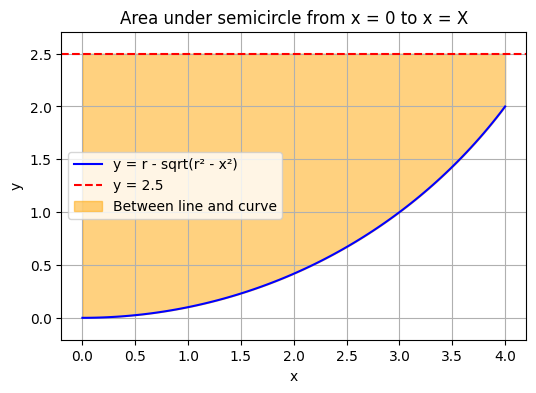

In [8]:
# Example parameters
r = 5           # radius of semicircle
X = 4           # upper limit of x
y_line = 2.5    # horizontal line at this y-value

# Semicircle curve
x_vals = np.linspace(0, X, 100)
y_vals = r - np.sqrt(r**2 - x_vals**2)

# Create the horizontal line y = y_line over same x range
y_const = np.full_like(x_vals, y_line)

# Plot everything
plt.figure(figsize=(6, 4))
plt.plot(x_vals, y_vals, label='y = r - sqrt(r² - x²)', color='blue')
#plt.fill_between(x_vals, y_vals, alpha=0.3, color='blue', label='Area A(X)')

# Plot horizontal line
plt.axhline(y=y_line, color='red', linestyle='--', label=f'y = {y_line}')

# Fill between curve and horizontal line
plt.fill_between(x_vals, y_line, y_vals, where=(y_vals < y_line), 
                 interpolate=True, color='orange', alpha=0.5, 
                 label='Between line and curve')

plt.title("Area under semicircle from x = 0 to x = X")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

Exact area A(X) for X=150.000, r=200: 26882.809
Numerical area (quad): 26882.809


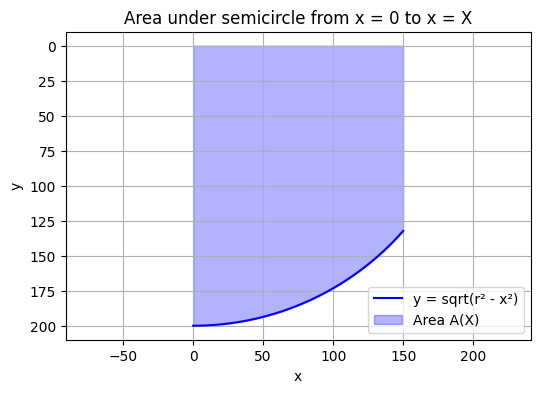

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, asin
from scipy.integrate import quad

# Exact semicircle area function from x = 0 to x = X < r
def semicircle_area_exact(X, r):
    if abs(X) >= r:
        raise ValueError("X must be strictly less than r")
    return 0.5 * X * sqrt(r**2 - X**2) + 0.5 * r**2 * asin(X / r)

# Numerical version (for checking)
def semicircle_area_numeric(X, r):
    integrand = lambda x: np.sqrt(r**2 - x**2)
    result, _ = quad(integrand, 0, X)
    return result

# Example usage
r = 200
X = 150

A_exact = semicircle_area_exact(X, r)
A_numeric = semicircle_area_numeric(X, r)

print(f"Exact area A(X) for X={X:.3f}, r={r}: {A_exact:.3f}")
print(f"Numerical area (quad): {A_numeric:.3f}")

# Optional: Plotting for visual sanity check
x_vals = np.linspace(0, X, 100)
y_vals = np.sqrt(r**2 - x_vals**2)

plt.figure(figsize=(6, 4))
plt.plot(x_vals, y_vals, label='y = sqrt(r² - x²)', color='blue')
plt.fill_between(x_vals, y_vals, alpha=0.3, color='blue', label='Area A(X)')
plt.title("Area under semicircle from x = 0 to x = X")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.axis('equal')

# Invert the y-axis so x-axis appears at top
plt.gca().invert_yaxis()

plt.show()

Outer semicircle area (r=200): 26882.809
Inner semicircle area (r=100): 7853.684


/tmp/ipykernel_2825/4292726311.py:27: RuntimeWarning: invalid value encountered in sqrt
  y2_vals = np.sqrt(r2**2 - x_vals**2)


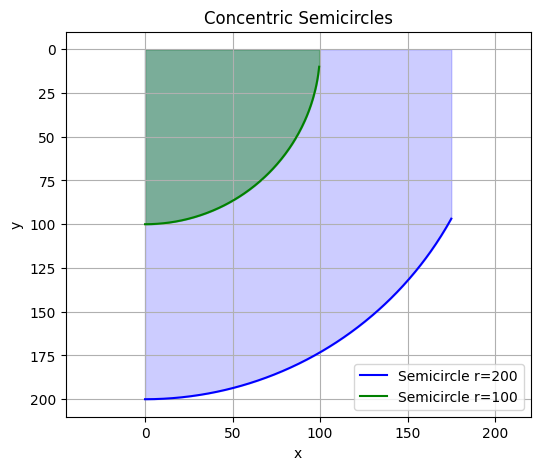

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, asin
from scipy.integrate import quad

# Exact area function from x = 0 to X < r
def semicircle_area_exact(X, r):
    if abs(X) >= r:
        raise ValueError("X must be strictly less than r")
    return 0.5 * X * sqrt(r**2 - X**2) + 0.5 * r**2 * asin(X / r)

# Define radii for concentric semicircles
r1 = 200
r2 = 100  # smaller radius
X1 = 150
X2 = 99.9

# Compute areas (optional, just to check)
A1 = semicircle_area_exact(X1, r1)
A2 = semicircle_area_exact(X2, r2)
print(f"Outer semicircle area (r={r1}): {A1:.3f}")
print(f"Inner semicircle area (r={r2}): {A2:.3f}")

# Create plot
x_vals = np.linspace(0, 175, 300)
y1_vals = np.sqrt(r1**2 - x_vals**2)
y2_vals = np.sqrt(r2**2 - x_vals**2)

plt.figure(figsize=(6, 5))
plt.plot(x_vals, y1_vals, color='blue', label=f'Semicircle r={r1}')
plt.plot(x_vals, y2_vals, color='green', label=f'Semicircle r={r2}')
plt.fill_between(x_vals, 0, y1_vals, alpha=0.2, color='blue')
plt.fill_between(x_vals, 0, y2_vals, alpha=0.4, color='green')

plt.title("Concentric Semicircles")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.gca().invert_yaxis()  # Put x-axis at top

plt.show()


/tmp/ipykernel_2825/303695097.py:15: RuntimeWarning: invalid value encountered in sqrt
  y2_vals = np.where(x_vals <= r2, np.sqrt(r2**2 - x_vals**2), np.nan)


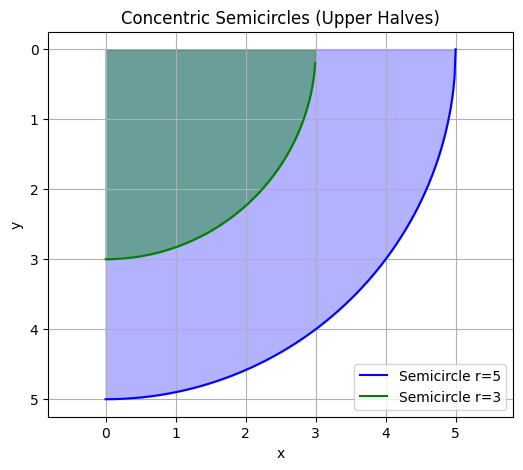

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Radii for the two semicircles
r1 = 5
r2 = 3

# Shared x-axis (covers the outer semicircle)
x_vals = np.linspace(0, r1, 300)

# Outer semicircle: safe for all x_vals
y1_vals = np.sqrt(r1**2 - x_vals**2)

# Inner semicircle: mask out values beyond r2
y2_vals = np.where(x_vals <= r2, np.sqrt(r2**2 - x_vals**2), np.nan)

# Plotting
plt.figure(figsize=(6, 5))
plt.plot(x_vals, y1_vals, label=f'Semicircle r={r1}', color='blue')
plt.fill_between(x_vals, 0, y1_vals, alpha=0.3, color='blue')

plt.plot(x_vals, y2_vals, label=f'Semicircle r={r2}', color='green')
plt.fill_between(x_vals, 0, y2_vals, alpha=0.4, color='green')

plt.title("Concentric Semicircles (Upper Halves)")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.gca().invert_yaxis()  # x-axis appears at top
plt.show()


/tmp/ipykernel_2825/1621538776.py:34: RuntimeWarning: invalid value encountered in sqrt
  y2_vals = np.where(x_vals <= r2, np.sqrt(r2**2 - x_vals**2), np.nan)


Centroid (Outer r=200): x̄ = ȳ = 84.88
Centroid (Inner r=100): x̄ = ȳ = 42.44
Composite centroid:     x̄ = ȳ = 99.03


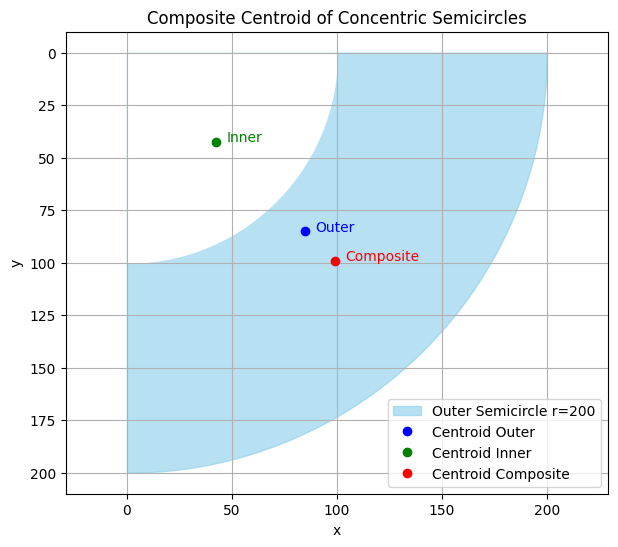

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, asin

# Parameters
r1 = 200  # Outer semicircle
r2 = 100  # Inner semicircle

# Area and centroid formulas
def semicircle_area(r):
    return 0.5 * pi * r**2

def semicircle_centroid(r):
    return (4 * r) / (3 * pi)

# Compute individual areas and centroids
A1 = semicircle_area(r1)
A2 = semicircle_area(r2)
xbar1 = ybar1 = semicircle_centroid(r1)
xbar2 = ybar2 = semicircle_centroid(r2)

# Composite centroid (outer minus inner)
A_comp = A1 - A2
xbar_comp = (A1 * xbar1 - A2 * xbar2) / A_comp
ybar_comp = (A1 * ybar1 - A2 * ybar2) / A_comp

print(f"Centroid (Outer r={r1}): x̄ = ȳ = {xbar1:.2f}")
print(f"Centroid (Inner r={r2}): x̄ = ȳ = {xbar2:.2f}")
print(f"Composite centroid:     x̄ = ȳ = {xbar_comp:.2f}")

# Plotting
x_vals = np.linspace(0, r1, 400)
y1_vals = np.sqrt(r1**2 - x_vals**2)
y2_vals = np.where(x_vals <= r2, np.sqrt(r2**2 - x_vals**2), np.nan)

plt.figure(figsize=(7, 6))

# Outer semicircle
plt.fill_between(x_vals, 0, y1_vals, color='skyblue', alpha=0.6, label=f'Outer Semicircle r={r1}')
# Inner semicircle (cut-out)
plt.fill_between(x_vals, 0, y2_vals, color='white', alpha=1.0)

# Plot centroids
plt.plot(xbar1, ybar1, 'bo', label='Centroid Outer')
plt.plot(xbar2, ybar2, 'go', label='Centroid Inner')
plt.plot(xbar_comp, ybar_comp, 'ro', label='Centroid Composite')

# Annotate
plt.text(xbar1+5, ybar1, 'Outer', color='blue')
plt.text(xbar2+5, ybar2, 'Inner', color='green')
plt.text(xbar_comp+5, ybar_comp, 'Composite', color='red')

# Plot formatting
plt.title("Composite Centroid of Concentric Semicircles")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.gca().invert_yaxis()  # x-axis at top
plt.show()


In [13]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

def area_segment(r, X):
    limit = min(r, X)
    f = lambda x: np.sqrt(r**2 - x**2)
    val, _ = quad(f, 0, limit)
    return val

def x_moment_segment(r, X):
    limit = min(r, X)
    f = lambda x: x * np.sqrt(r**2 - x**2)
    val, _ = quad(f, 0, limit)
    return val

def y_moment_segment(r, X):
    limit = min(r, X)
    f = lambda x: 0.5 * (r**2 - x**2)
    val, _ = quad(f, 0, limit)
    return val

# Inputs
r1 = 200
r2 = 100
X = 150  # arbitrary cutoff (could be > r2)

# Compute areas
A1 = area_segment(r1, X)
A2 = area_segment(r2, X)
A_comp = A1 - A2

# First moments
Mx1 = x_moment_segment(r1, X)
Mx2 = x_moment_segment(r2, X)
Mx_comp = Mx1 - Mx2

My1 = y_moment_segment(r1, X)
My2 = y_moment_segment(r2, X)
My_comp = My1 - My2

# Centroids
xbar = Mx_comp / A_comp
ybar = My_comp / A_comp

print(f"Composite Area = {A_comp:.3f}")
print(f"Centroid x̄ = {xbar:.3f}")
print(f"Centroid ȳ = {ybar:.3f}")


Composite Area = 19028.827
Centroid x̄ = 82.068
Centroid ȳ = 110.578


Composite area A = 23561.945
Centroid (x̄, ȳ) = (99.030, 99.030)


/tmp/ipykernel_2825/3783330213.py:50: RuntimeWarning: invalid value encountered in sqrt
  y2_vals = np.where(x_vals <= r2, np.sqrt(r2**2 - x_vals**2), np.nan)


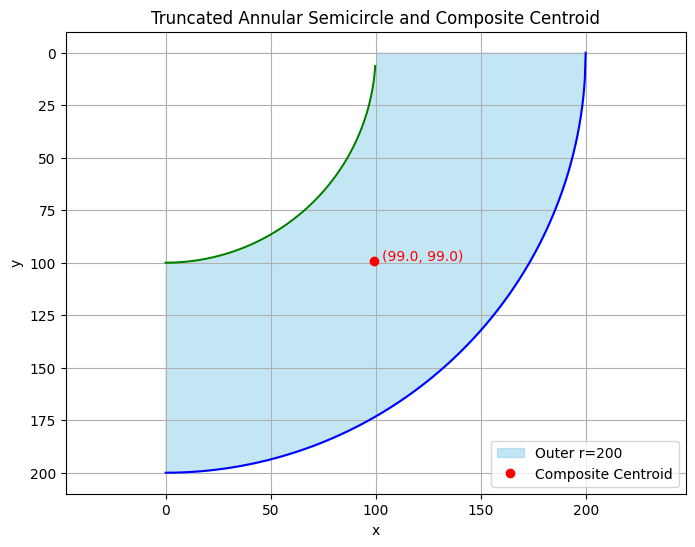

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def plot_composite_annular_segment(r1, r2, X):
    assert r1 > r2 > 0, "Require r1 > r2 > 0"
    assert X > 0, "X must be positive"

    # Integration helpers
    def area_segment(r, Xlim):
        limit = min(r, Xlim)
        f = lambda x: np.sqrt(r**2 - x**2)
        val, _ = quad(f, 0, limit)
        return val

    def x_moment_segment(r, Xlim):
        limit = min(r, Xlim)
        f = lambda x: x * np.sqrt(r**2 - x**2)
        val, _ = quad(f, 0, limit)
        return val

    def y_moment_segment(r, Xlim):
        limit = min(r, Xlim)
        f = lambda x: 0.5 * (r**2 - x**2)
        val, _ = quad(f, 0, limit)
        return val

    # Areas and moments
    A1 = area_segment(r1, X)
    A2 = area_segment(r2, X)
    A_comp = A1 - A2

    Mx1 = x_moment_segment(r1, X)
    Mx2 = x_moment_segment(r2, X)
    Mx_comp = Mx1 - Mx2

    My1 = y_moment_segment(r1, X)
    My2 = y_moment_segment(r2, X)
    My_comp = My1 - My2

    xbar = Mx_comp / A_comp
    ybar = My_comp / A_comp

    print(f"Composite area A = {A_comp:.3f}")
    print(f"Centroid (x̄, ȳ) = ({xbar:.3f}, {ybar:.3f})")

    # Plotting
    x_vals = np.linspace(0, X, 500)
    y1_vals = np.sqrt(r1**2 - x_vals**2)
    y2_vals = np.where(x_vals <= r2, np.sqrt(r2**2 - x_vals**2), np.nan)

    plt.figure(figsize=(8, 6))

    # Outer shape
    plt.fill_between(x_vals, 0, y1_vals, alpha=0.5, color='skyblue', label=f"Outer r={r1}")
    # Inner shape (cutout)
    plt.fill_between(x_vals, 0, y2_vals, alpha=1.0, color='white')

    # Edges
    plt.plot(x_vals, y1_vals, 'b')
    plt.plot(x_vals, y2_vals, 'g')

    # Centroid marker
    plt.plot(xbar, ybar, 'ro', label="Composite Centroid")
    plt.text(xbar + r1*0.02, ybar, f"({xbar:.1f}, {ybar:.1f})", color='red')

    # Formatting
    plt.title("Truncated Annular Semicircle and Composite Centroid")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis('equal')
    plt.grid(True)
    plt.legend()
    plt.gca().invert_yaxis()  # place x-axis at top
    plt.show()

# Example call
plot_composite_annular_segment(r1=200, r2=100, X=200)
